In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
IND="IND"
SA="SA"
AUS="AUS"
NZ="NZ"
AFG="AFG"
PAK="PAK"
BAN="BAN"
SL="SL"
ENG="ENG"
NED="NED"

### All Possibilities by recursion

In [3]:
points_map = {IND:7, SA:6, AUS:4, NZ:4, AFG:4, PAK:3, BAN:1, SL:2, ENG:1, NED:2}
rem_match = [(IND, SA), (IND,NED), (SA,AFG), (AFG,AUS), (PAK,NZ),
             (AUS,BAN), (AUS,ENG), (NZ,SL), (PAK,ENG), (SL,BAN), (ENG,NED)]
rem_match_count = len(rem_match)
pref_team = [SA, IND, AUS, NZ, PAK, AFG, SL, NED, BAN, ENG]
pref_team.reverse()

In [4]:
final_scores = {IND:[0,0,0,0,0,0,0,0,0,0],
                 SA:[0,0,0,0,0,0,0,0,0,0],
                 AUS:[0,0,0,0,0,0,0,0,0,0],
                 NZ:[0,0,0,0,0,0,0,0,0,0],
                 AFG:[0,0,0,0,0,0,0,0,0,0],
                 PAK:[0,0,0,0,0,0,0,0,0,0],
                 BAN:[0,0,0,0,0,0,0,0,0,0],
                 SL:[0,0,0,0,0,0,0,0,0,0],
                 ENG:[0,0,0,0,0,0,0,0,0,0],
                 NED:[0,0,0,0,0,0,0,0,0,0]}

In [5]:
def complete_matches(points_map, rem_match, final_scores, pref_team):
    if not rem_match:
        curr_tup = [(k,v) for k,v in points_map.items()]
        curr_tup.sort(reverse=True, key=lambda x: (x[1], pref_team.index(x[0])))
        for i, (team, point) in enumerate(curr_tup):
            final_scores[team][i] += 1
        return
    curr_match = rem_match.pop()
    next_rem_match = rem_match.copy()
    next_points_map = points_map.copy()
    next_points_map[curr_match[0]] += 1
    complete_matches(next_points_map, next_rem_match, final_scores, pref_team)
    next_points_map = points_map.copy()
    next_rem_match = rem_match.copy()
    next_points_map[curr_match[1]] += 1
    complete_matches(next_points_map, next_rem_match, final_scores, pref_team)
    return


In [6]:
complete_matches(points_map, rem_match, final_scores, pref_team)

In [7]:
for k, v in final_scores.items():
    final_scores[k] = [round((x / sum(v))*100, 2) for x in v]
final_scores

{'IND': [62.5, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'SA': [37.5, 59.38, 3.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'AUS': [0.0, 3.12, 65.62, 17.19, 12.5, 1.56, 0.0, 0.0, 0.0, 0.0],
 'NZ': [0.0, 0.0, 15.62, 53.12, 21.88, 9.38, 0.0, 0.0, 0.0, 0.0],
 'AFG': [0.0, 0.0, 14.84, 19.53, 41.41, 24.22, 0.0, 0.0, 0.0, 0.0],
 'PAK': [0.0, 0.0, 0.78, 10.16, 24.22, 49.22, 12.5, 3.12, 0.0, 0.0],
 'BAN': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.34, 11.72, 38.28, 47.66],
 'SL': [0.0, 0.0, 0.0, 0.0, 0.0, 6.25, 50.78, 27.34, 11.72, 3.91],
 'ENG': [0.0, 0.0, 0.0, 0.0, 0.0, 4.69, 7.81, 14.06, 29.69, 43.75],
 'NED': [0.0, 0.0, 0.0, 0.0, 0.0, 4.69, 26.56, 43.75, 20.31, 4.69]}

In [8]:
path = f'./RECURSION/recursion_{rem_match_count}.txt'
with open(path, 'w') as f:
    for k, v in final_scores.items():
        f.write(f'{str(k):3} : {str(v)}\n')

In [9]:
path = f'./RECURSION/recursion_{rem_match_count}.xlsx'
final_scores_df = pd.DataFrame(final_scores)
final_scores_df.index = range(1, len(final_scores_df) + 1)
final_scores_df.to_excel(path, index_label='Position')
final_scores_df

,IND,SA,AUS,NZ,AFG,PAK,BAN,SL,ENG,NED
1,62.5,37.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,37.5,59.38,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,3.12,65.62,15.62,14.84,0.78,0.00,0.00,0.00,0.00
4,0.0,0.00,17.19,53.12,19.53,10.16,0.00,0.00,0.00,0.00
5,0.0,0.00,12.50,21.88,41.41,24.22,0.00,0.00,0.00,0.00
6,0.0,0.00,1.56,9.38,24.22,49.22,0.00,6.25,4.69,4.69
7,0.0,0.00,0.00,0.00,0.00,12.50,2.34,50.78,7.81,26.56
8,0.0,0.00,0.00,0.00,0.00,3.12,11.72,27.34,14.06,43.75
9,0.0,0.00,0.00,0.00,0.00,0.00,38.28,11.72,29.69,20.31
10,0.0,0.00,0.00,0.00,0.00,0.00,47.66,3.91,43.75,4.69


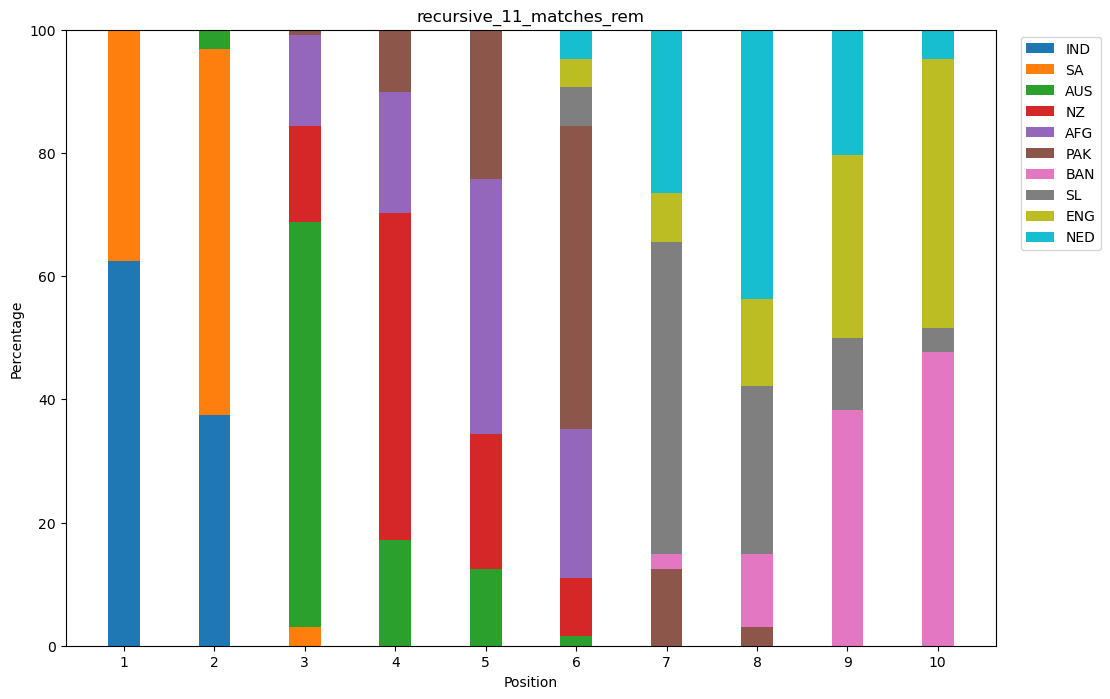

In [10]:
x = np.arange(len(final_scores.keys()))
bottom = np.zeros(len(final_scores.keys()))

plt.figure(figsize=(12,8))
for k, v in final_scores.items():
    plt.bar(x, v, label = k, bottom=bottom, width=0.35)
    bottom = np.add(bottom, v)

plt.xlabel("Position")
plt.ylabel("Percentage")
plt.title(f'recursive_{rem_match_count}_matches_rem')
plt.xticks(x, [str(i+1) for i in range(len(final_scores.keys()))])
plt.legend(loc='upper right', bbox_to_anchor=(1.12 ,1))
plt.savefig(f'./RECURSION/recursion_{rem_match_count}.png')
plt.show()

### Monte Carlo Approach

In [11]:
points_map = {IND:7, SA:6, AUS:4, NZ:4, AFG:4, PAK:3, BAN:1, SL:2, ENG:1, NED:2}
rem_match = [(IND, SA), (IND,NED), (SA,AFG), (AFG,AUS), (PAK,NZ),
             (AUS,BAN), (AUS,ENG), (NZ,SL), (PAK,ENG), (SL,BAN), (ENG,NED)]
rem_match_count = len(rem_match)
pref_team = [SA, IND, AUS, NZ, PAK, AFG, SL, NED, BAN, ENG]
pref_team.reverse()

In [12]:
final_scores_mc = {IND:[0,0,0,0,0,0,0,0,0,0],
                 SA:[0,0,0,0,0,0,0,0,0,0],
                 AUS:[0,0,0,0,0,0,0,0,0,0],
                 NZ:[0,0,0,0,0,0,0,0,0,0],
                 AFG:[0,0,0,0,0,0,0,0,0,0],
                 PAK:[0,0,0,0,0,0,0,0,0,0],
                 BAN:[0,0,0,0,0,0,0,0,0,0],
                 SL:[0,0,0,0,0,0,0,0,0,0],
                 ENG:[0,0,0,0,0,0,0,0,0,0],
                 NED:[0,0,0,0,0,0,0,0,0,0]}

In [13]:
for i in range(1, 100000):
    temp_points_map = points_map.copy()
    for match in rem_match:
        win_prob = random.randint(0,1)
        temp_points_map[match[0]] = temp_points_map[match[0]]+1 if win_prob == 1 else temp_points_map[match[0]]
        temp_points_map[match[1]] = temp_points_map[match[1]]+1 if win_prob == 0 else temp_points_map[match[1]]
    curr_tup = [(k,v) for k,v in temp_points_map.items()]
    curr_tup.sort(reverse=True, key=lambda x: (x[1], pref_team.index(x[0])))
    for i, (team, point) in enumerate(curr_tup):
        final_scores_mc[team][i] += 1

In [14]:
for k, v in final_scores_mc.items():
    final_scores_mc[k] = [round((x / sum(v))*100, 2) for x in v]

In [15]:
path = f'./MONTE_CARLO/monte_carlo_{rem_match_count}.txt'
with open(path, 'w') as f:
    for k, v in final_scores_mc.items():
        f.write(f'{str(k):3} : {str(v)}\n')

In [16]:
path = f'./MONTE_CARLO/monte_carlo_{rem_match_count}.xlsx'
final_scores_df = pd.DataFrame(final_scores_mc)
final_scores_df.index = range(1, len(final_scores_df) + 1)
final_scores_df.to_excel(path, index_label='Position')
final_scores_df

,IND,SA,AUS,NZ,AFG,PAK,BAN,SL,ENG,NED
1,62.58,37.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,37.42,59.39,3.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,3.19,65.56,15.54,14.91,0.80,0.00,0.00,0.00,0.00
4,0.00,0.00,17.10,53.17,19.65,10.08,0.00,0.00,0.00,0.00
5,0.00,0.00,12.58,21.91,41.38,24.14,0.00,0.00,0.00,0.00
6,0.00,0.00,1.57,9.39,24.06,49.48,0.00,6.23,4.61,4.66
7,0.00,0.00,0.00,0.00,0.00,12.46,2.38,50.91,7.78,26.47
8,0.00,0.00,0.00,0.00,0.00,3.04,11.76,27.26,14.12,43.82
9,0.00,0.00,0.00,0.00,0.00,0.00,38.23,11.75,29.78,20.23
10,0.00,0.00,0.00,0.00,0.00,0.00,47.62,3.85,43.71,4.82


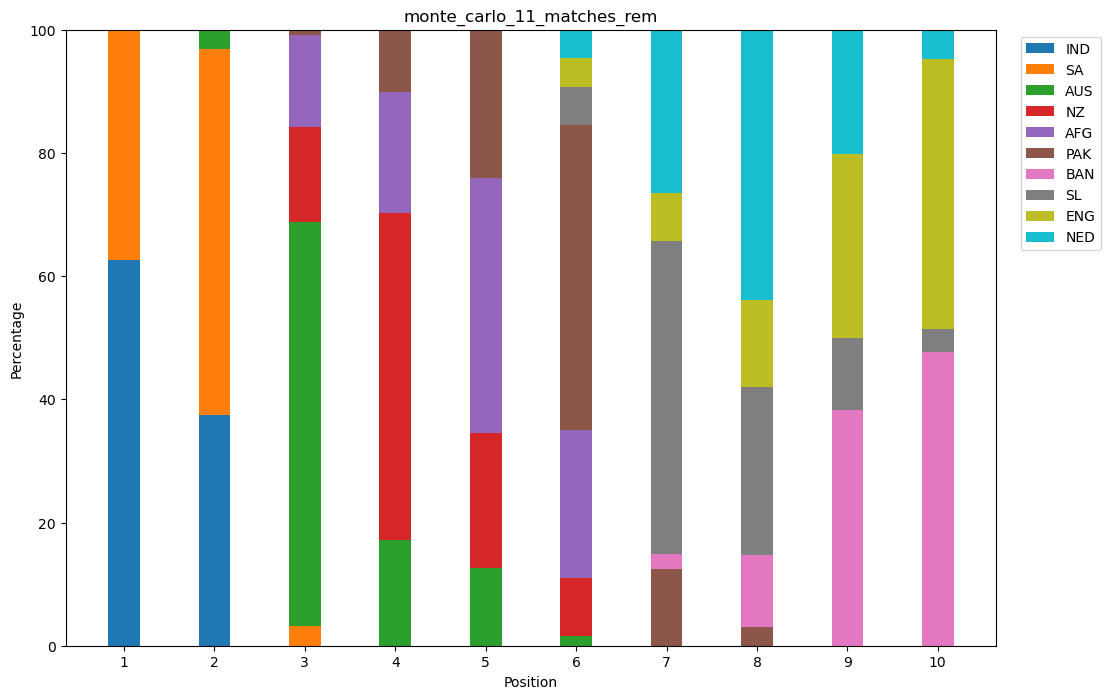

In [17]:
x = np.arange(len(final_scores_mc.keys()))
bottom = np.zeros(len(final_scores_mc.keys()))

plt.figure(figsize=(12,8))
for k, v in final_scores_mc.items():
    plt.bar(x, v, label = k, bottom=bottom, width=0.35)
    bottom = np.add(bottom, v)

plt.xlabel("Position")
plt.ylabel("Percentage")
plt.title(f'monte_carlo_{rem_match_count}_matches_rem')
plt.xticks(x, [str(i+1) for i in range(len(final_scores_mc.keys()))])
plt.legend(loc='upper right', bbox_to_anchor=(1.12 ,1))
plt.savefig(f'./MONTE_CARLO/monte_carlo_{rem_match_count}.png')
plt.show()